### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

### LOADING THE DATA & PREPROCESSING THE DATA

In [6]:
calories_data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 3/Rapid EDA & MLR/Calories/archive-2/calories.csv')


In [7]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise_data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 3/Rapid EDA & MLR/Calories/archive-2/exercise.csv')

In [9]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
# Look calories_data, excercise_data info

### MERGE

In [10]:
combined_data = pd.concat([exercise_data,calories_data['Calories']], axis=1)

In [1]:
# biometrics = pd.merge(exercise, calories, left_on="User_ID", right_on="User_ID", how='left')

In [11]:
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
combined_data.shape

(15000, 9)

In [14]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [2]:
# Drop unnecessary columns using try and except
#try:
#    biometrics.drop(columns=["id"], inplace=True)
#except:
#    print("`ID` column already dropped.")

In [5]:
# Binarize sex into integer data
#- `male`: `0`
#- `female`: `1`

### ANALYZE

#### (Kashy Questions) DQ: _What is the average peak heart rate across adult men and women dependent on exercise lasting less than or greater than/equal to 15 minutes?_

In [16]:
combined_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [17]:
sns.set()

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_27546/3371784712.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender', data=combined_data, palette='Set2')


<Axes: xlabel='count', ylabel='Gender'>

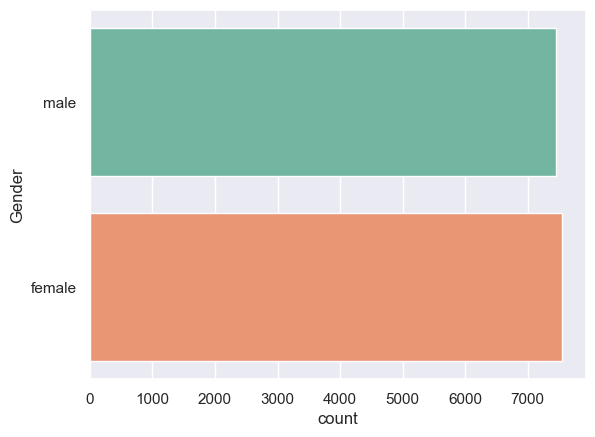

In [19]:
sns.countplot(y='Gender', data=combined_data, palette='Set2')

From the above plot, we can observe that the data is evenly distributed(almost 7000) for both males and females.

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_27546/2626984116.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

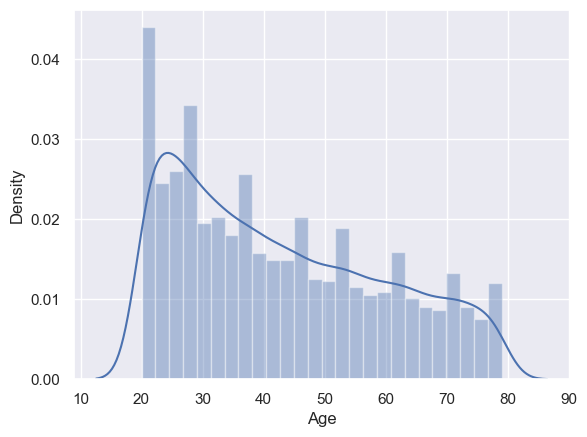

In [20]:
#inorder to find the distribution of age column
sns.distplot(combined_data['Age'])

From the above plot, we can observe that the Age column has the mean value of 42 and the data is positively skewed & most of the datapoints are in between 20 to 50.

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_27546/1502964653.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

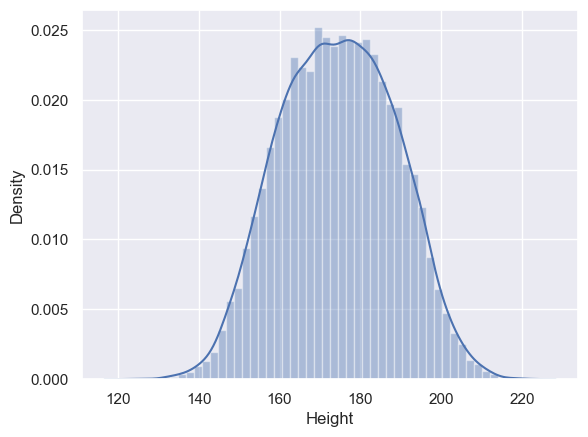

In [21]:
#inorder to find the distribution of height column
sns.distplot(combined_data['Height'])

Hence,from the above plot we can observe that the height data is normally distributed with mean of 174cm.

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_27546/1063056932.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

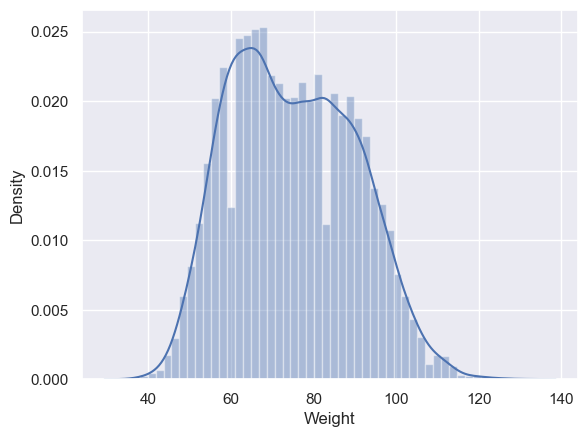

In [22]:
#inorder to find the distribution of weight column
sns.distplot(combined_data['Weight'])

Hence,from the above plot we can observe that the weight data is also normally distributed with mean of 74 kg

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_27546/390075107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

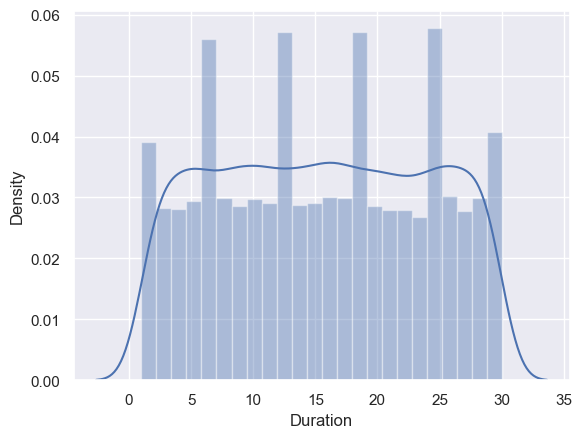

In [23]:
sns.distplot(combined_data['Duration'])

Hence, from the above plot we can observe that the duration data is a low peaked data with mean of 15mins

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_27546/3932339865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

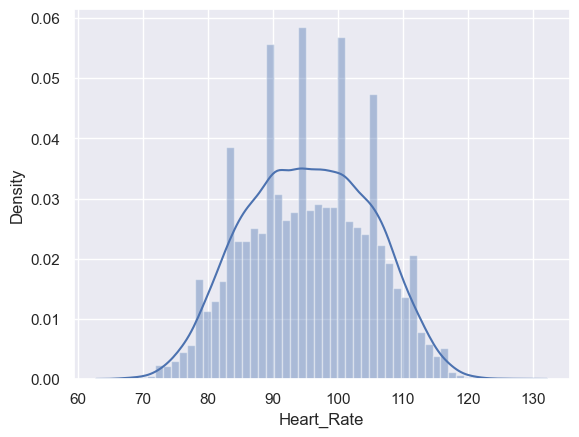

In [24]:
sns.distplot(combined_data['Heart_Rate'])

Hence,from the above plot we can observe that the heart rate column is normally distributed with mean of 95 heart beats with several outliers.

/var/folders/tc/1ms7n2d57vv5dn_343mwj34r0000gn/T/ipykernel_27546/647738398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

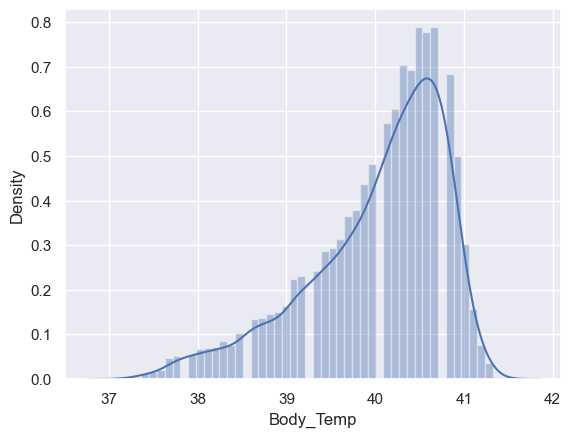

In [25]:
sns.distplot(combined_data['Body_Temp'])

Hence,from the above plot we can observe that the temperature column is negatively skewed with mean of 40.

### CORRELATION

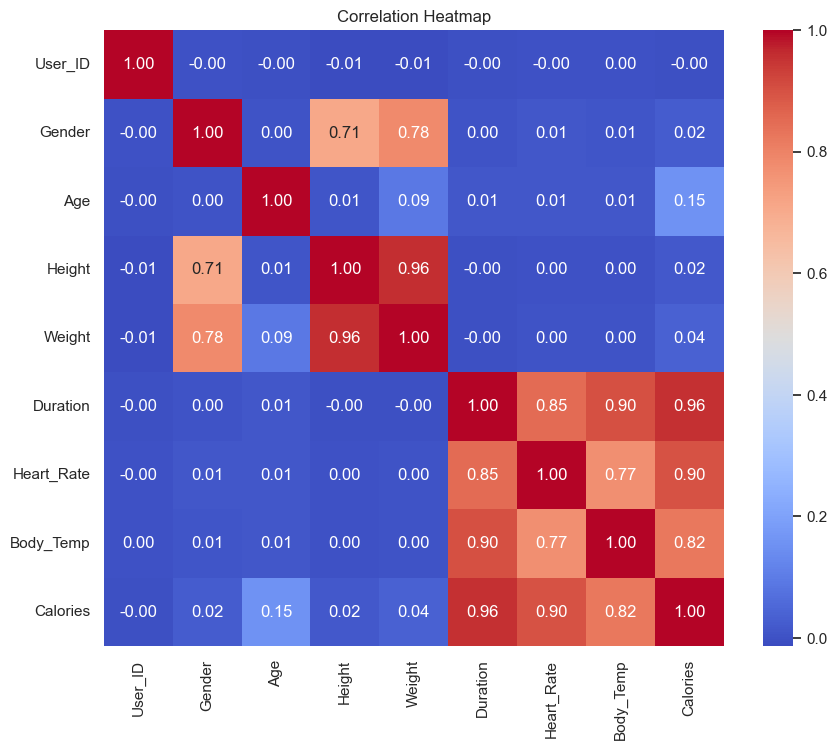

In [27]:
combined_data['Gender'] = combined_data['Gender'].map({'male': 1, 'female': 0})
correlation = combined_data.corr()

#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


1. Highly Correlated Features:

Duration shows a very high positive correlation with Calories (0.96), suggesting that exercise duration is a strong predictor of calorie burn.
Heart Rate and Body Temp also have strong positive correlations with Calories (0.90 and 0.82, respectively), indicating that more intense exercise (reflected by higher heart rates and body temperature) may lead to higher calorie expenditure.

2. Multicollinearity Concerns:

Height and Weight are highly correlated with each other (0.96) and with Gender. Height and Weight both show moderate correlations with Calories, so including both might introduce redundancy.
Duration has moderate-to-strong correlations with Heart Rate (0.85) and Body Temp (0.90), meaning these variables might also carry overlapping information about exercise intensity.

3. Low Correlation Variables:

Age has a low correlation with Calories (0.15), suggesting it might not be a strong predictor. However, it could still add value in non-linear models.

In [7]:
# Statistical Testing (Inferential Statistics)
#from scipy.stats import zscore, norm
#from statsmodels.stats.weightstats import ztest, ttest_ind

#alpha = 0.05

### I.Q. For subjects performing light workouts (<15 minutes), is the difference in average body temperature across adult men and adult women?
### I.Q. For subjects performing moderate workouts (<15 minutes), is the difference in average body temperature across adult men and adult women?
### I.Q. For adult men, is the difference in average body temperature from light workouts (<15 minutes) to moderate workouts (≥15 minutes) statistically significant?
### I.Q. For adult women, is the difference in average body temperature from light workouts (<15 minutes) to moderate workouts (≥15 minutes) statistically significant?

### SPLIT THE DATA INTO TRAINING DATA & TEST DATA

In [8]:
# Kashy's prediction questions
#Based on descriptive and inferential findings, I'm curious about predicting the following factors:
#- Binarized Sex (Classification)
#- Workout Duration Type (Classification – Manual Processing Needed)
#- Burned Calories (Regression)
### P.Q. Can I effectively predict a subject's sex from other biometric data? (kNN, SVM, Decision Tree, Gausssian Naive Bayesian model)
### P.Q. Can I effectively predict a subject's burned calories from other biometric data? (Linear Regression)

In [28]:
# Split the data into training data and test data
X = combined_data.drop(columns=['Calories'])
y = combined_data['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (12000, 8)
Test data shape: (3000, 8)


### SELECT MODELING METHODS

Multiple Linear Regression (MLR) with Selected Features, Tree-Based Models (Decision Tree, Random Forest, Gradient Boosting), Support Vector Regression (SVR) with Non-Linear Kernels, Principal Component Analysis (PCA)

1. Multiple Linear Regression (MLR) with Selected Features

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Selecting only the most relevant features based on previous analysis (e.g., Duration, Heart_Rate, Body_Temp)
X_selected = combined_data[['Duration', 'Heart_Rate', 'Body_Temp']]
y_selected = combined_data['Calories']

# Splitting the data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Initialize and train the Multiple Linear Regression model
mlr_model_selected = LinearRegression()
mlr_model_selected.fit(X_train_sel, y_train_sel)

# Make predictions on the test set
y_pred_sel = mlr_model_selected.predict(X_test_sel)

# Evaluate the model
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
mae_sel = mean_absolute_error(y_test_sel, y_pred_sel)
r2_sel = r2_score(y_test_sel, y_pred_sel)

# Displaying the results
selected_results = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R2 Score'],
    'Value': [mse_sel, mae_sel, r2_sel]
})

print("MLR with Selected Features Results")
print(selected_results)




MLR with Selected Features Results
     Metric       Value
0       MSE  216.082357
1       MAE   10.648723
2  R2 Score    0.946458


2. Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model with basic parameters
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model using MSE and R2 Score
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Results:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)


Random Forest Results:
MSE: 95.84672899585095
R2 Score: 0.9762508222899609


1. The MSE of 95.85 indicates the average squared error of the predictions.

2. The R2 score of 0.976 indicates that the model explains 97.6% of the variance in the target variable, which is excellent.

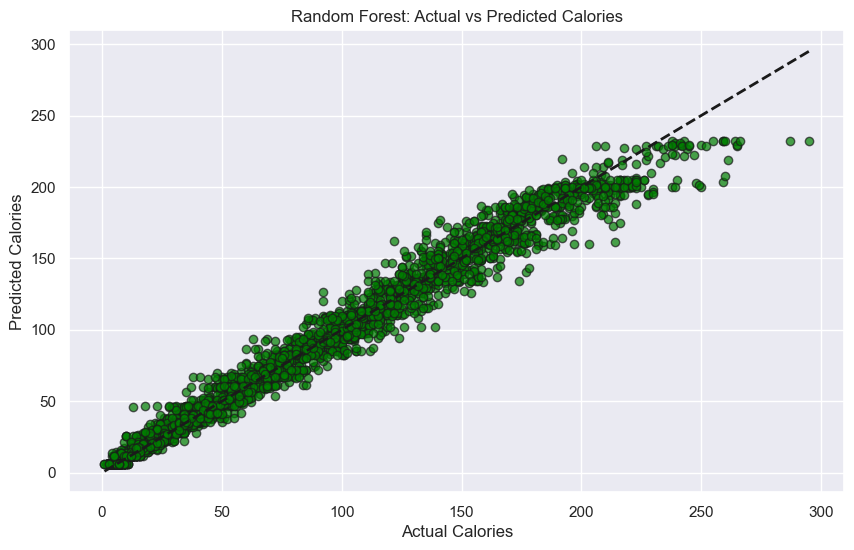

In [54]:
# visualize random forest
# BEGIN: visualize random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Random Forest: Actual vs Predicted Calories')
plt.show()
# END: visualize random forest

In [ ]:
# Create a DataFrame to summarize the evaluation results
evaluation_results = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regression', 'PCA + Linear Regression'],
    'MSE': [mse_sel, rf_mse, gb_mse, svr_mse, pca_mse],
    'R2 Score': [r2_sel, rf_r2, gb_r2, svr_r2, pca_r2]
})

print("Evaluation Results")
print(evaluation_results)

Evaluation Results
                        Model          MSE  R2 Score
0  Multiple Linear Regression   216.082357  0.946458
1               Random Forest    95.846729  0.976251
2           Gradient Boosting    26.857387  0.993345
3   Support Vector Regression  4216.562264 -0.044792
4     PCA + Linear Regression  3921.062651  0.028428


3. Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting model with basic parameters
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model using MSE and R2 Score
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Gradient Boosting Results:")
print("MSE:", gb_mse)
print("R2 Score:", gb_r2)


Gradient Boosting Results:
MSE: 26.85738710765263
R2 Score: 0.9933451995083258


The low MSE and high R2 score indicate that your Gradient Boosting model is performing exceptionally well on the given dataset. It accurately predicts the target variable with minimal error and explains almost all of the variance in the data.

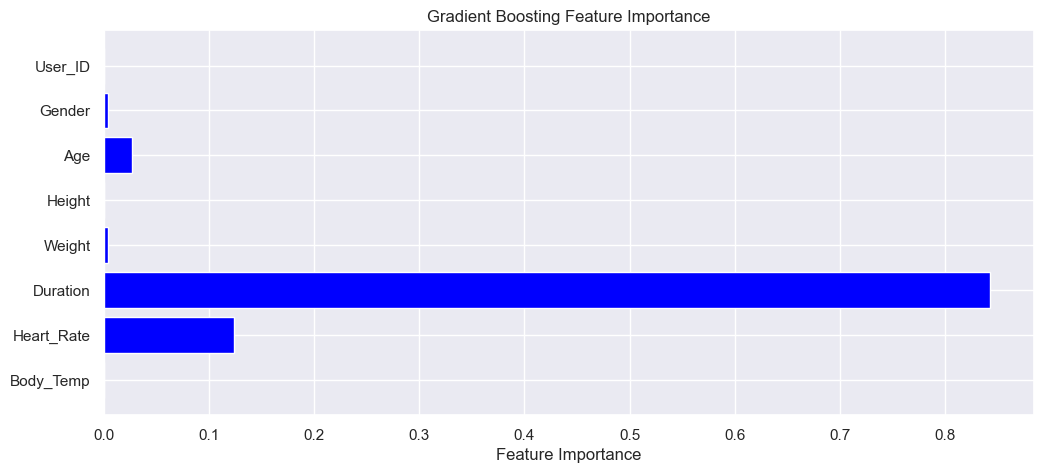

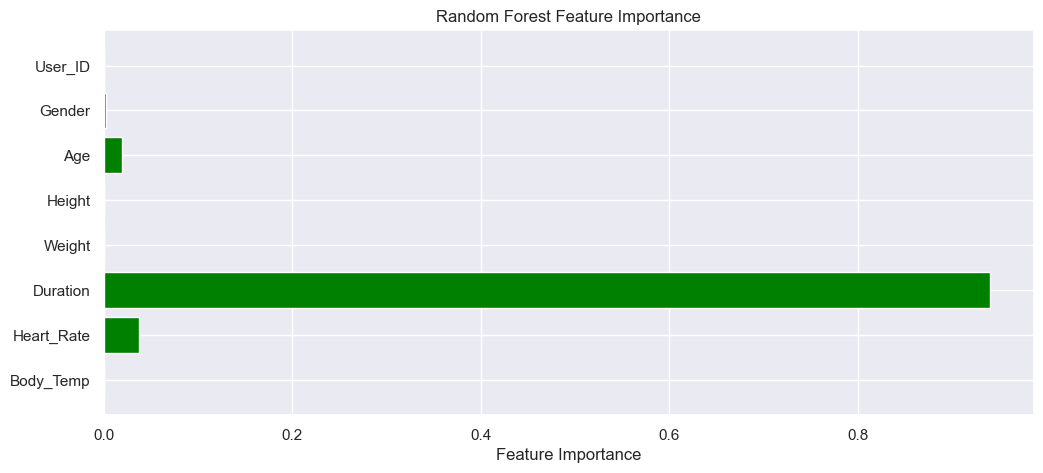

In [37]:
# Extracting feature importances for both models
feature_names = X.columns

# Feature importances for Gradient Boosting
gb_feature_importances = gb_model.feature_importances_

# Feature importances for Random Forest
rf_feature_importances = rf_model.feature_importances_

# Plotting feature importance for Gradient Boosting
plt.figure(figsize=(12, 5))
plt.barh(feature_names, gb_feature_importances, color="blue")
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Plotting feature importance for Random Forest
plt.figure(figsize=(12, 5))
plt.barh(feature_names, rf_feature_importances, color="green")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


4. Support Vector Regression (SVR) with Non-Linear Kernels

In [48]:
from sklearn.svm import SVR
# Initialize the Support Vector Regression model with a non-linear kernel
svr_model = SVR(kernel='rbf')

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_y_pred = svr_model.predict(X_test)

# Evaluate the model using MSE and R2 Score
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print("Support Vector Regression (SVR) with Non-Linear Kernels Results:")
print("MSE:", svr_mse)
print("R2 Score:", svr_r2)


Support Vector Regression (SVR) with Non-Linear Kernels Results:
MSE: 4216.562264240496
R2 Score: -0.04479190461708571


The high MSE and negative R2 score indicate that the SVR model with non-linear kernels is not performing well.

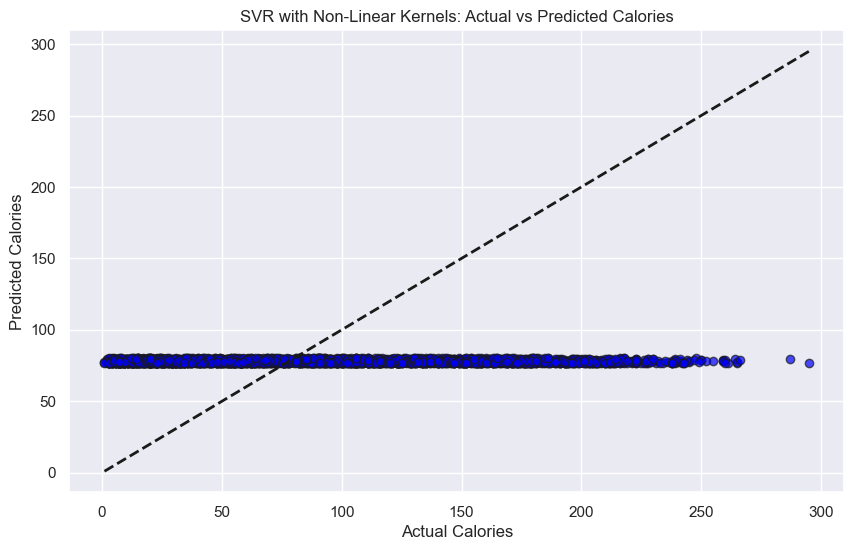

In [52]:
# Visualizing SVR with Non-Linear Kernels results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('SVR with Non-Linear Kernels: Actual vs Predicted Calories')
plt.show()

5. Principal Component Analysis (PCA)

In [49]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize PCA and Linear Regression
pca = PCA(n_components=3)
lr_model = LinearRegression()

# Fit PCA on the training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit the Linear Regression model on the transformed training data
lr_model.fit(X_train_pca, y_train)

# Make predictions on the transformed test data
y_pred_pca = lr_model.predict(X_test_pca)

# Evaluate the model using MSE and R2 Score
pca_mse = mean_squared_error(y_test, y_pred_pca)
pca_r2 = r2_score(y_test, y_pred_pca)

print("PCA + Linear Regression Results:")
print("MSE:", pca_mse)
print("R2 Score:", pca_r2)

PCA + Linear Regression Results:
MSE: 3921.0626506742756
R2 Score: 0.028427838084158275


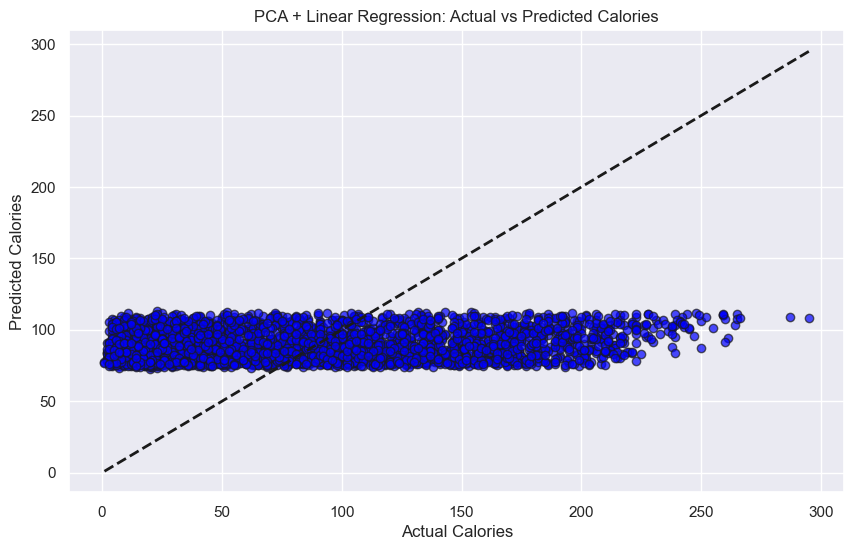

In [51]:
# Visualizing PCA + Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pca, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('PCA + Linear Regression: Actual vs Predicted Calories')
plt.show()

Both the high MSE and low R2 score indicate that the model is not performing well. It is not accurately predicting the target variable and is not explaining much of the variance in the data.

### EVALUATION

In [50]:
# Create a DataFrame to summarize the evaluation results
evaluation_results = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regression', 'PCA + Linear Regression'],
    'MSE': [mse_sel, rf_mse, gb_mse, svr_mse, pca_mse],
    'R2 Score': [r2_sel, rf_r2, gb_r2, svr_r2, pca_r2]
})

print("Evaluation Results")
print(evaluation_results)

Evaluation Results
                        Model          MSE  R2 Score
0  Multiple Linear Regression   216.082357  0.946458
1               Random Forest    95.846729  0.976251
2           Gradient Boosting    26.857387  0.993345
3   Support Vector Regression  4216.562264 -0.044792
4     PCA + Linear Regression  3921.062651  0.028428


Gradient Boosting is the best-performing model for predicting calories burned, followed by Random Forest and Multiple Linear Regression. Support Vector Regression and PCA + Linear Regression models do not perform well and are not suitable for this dataset.

In [56]:
# Let's predict something using the gradient boosting model

sample_data = X_test.iloc[0:5]  # Taking a sample of 5 rows from the test set
predictions = gb_model.predict(sample_data)

# Displaying the predictions
predicted_df = pd.DataFrame({
    'Actual Calories': y_test.iloc[0:5],
    'Predicted Calories': predictions
})

print(predicted_df)

       Actual Calories  Predicted Calories
11499            173.0          168.316295
6475             189.0          197.266282
13167             53.0           51.240142
862              161.0          162.433085
5970             226.0          221.257694
